In [1]:
import shap
import pandas as pd
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

In [2]:
shap.initjs() 

In [3]:
df = pd.read_parquet("../dataset/curated/marts_ml_train_sel_manual.parquet")
df.head()

,price,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,kamar_pembantu,kamar_mandi_pembantu,daya_listrik,jumlah_lantai,lebar_jalan,...,facility_ac,facility_keamanan,facility_laundry,facility_masjid,house_mat_bata_hebel,house_mat_bata_merah,tag_cash_bertahap,tag_komplek,tag_kpr,tag_perumahan
0,380.0,72.0,65.0,2,2,0,0,1300.0,1,1.0,...,1,1,0,1,1,0,0,1,1,1
1,2500.0,325.0,212.0,3,2,1,1,4400.0,2,3.0,...,1,1,1,0,0,1,0,1,1,1
2,3200.0,278.0,300.0,5,3,1,1,3500.0,2,2.0,...,1,1,1,0,0,1,0,1,1,1
3,1800.0,180.0,200.0,3,3,1,1,3500.0,2,2.0,...,1,1,0,1,0,1,0,1,1,1
4,515.0,72.0,63.0,2,1,0,0,1300.0,1,2.0,...,0,1,1,1,1,0,0,1,1,1


In [4]:
df_sampled = df.sample(frac=0.1, random_state=42)

X = df_sampled.drop(columns=["price"])
y = df_sampled["price"]

# identify columns
cat_cols = [col for col in df.select_dtypes(include=["object"]).columns]

# create pool
train_pool = Pool(data=X, label=y, cat_features=cat_cols)

In [5]:
clf = CatBoostRegressor()
clf.load_model("..//ml_models/sel_manual_catboost/model.cbm")

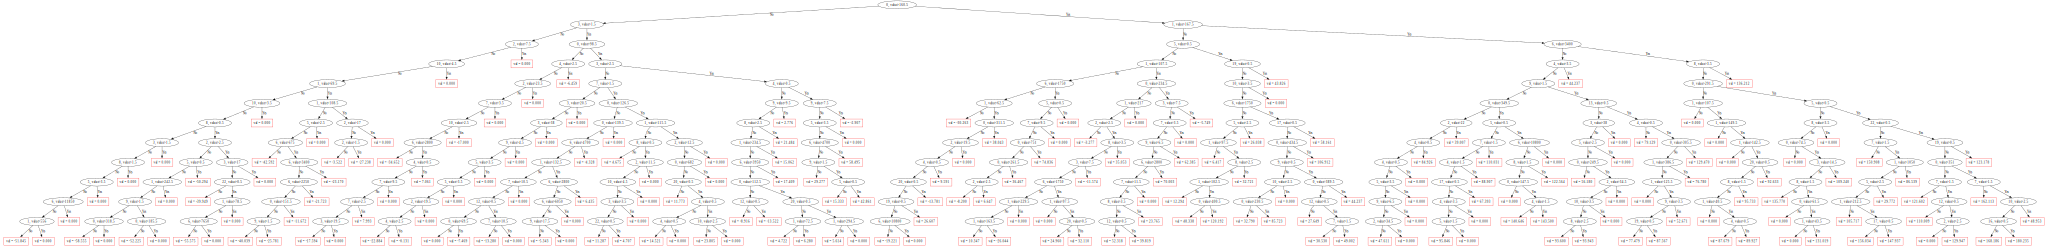

In [6]:
clf.plot_tree(tree_idx=0)

## SHAP doc

In [7]:
shap_values = clf.get_feature_importance(Pool(X, y), type='ShapValues')

In [8]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], X.iloc[0,:])

In [9]:
shap.force_plot(expected_value, shap_values[1,:], X.iloc[1,:])

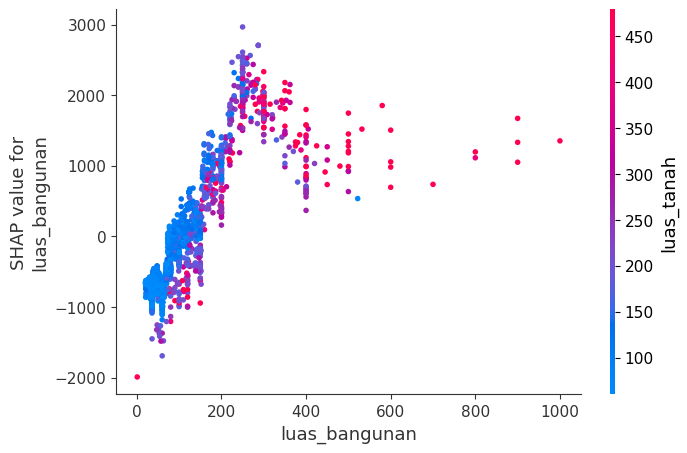

In [26]:
shap.dependence_plot("luas_bangunan", shap_values, X)

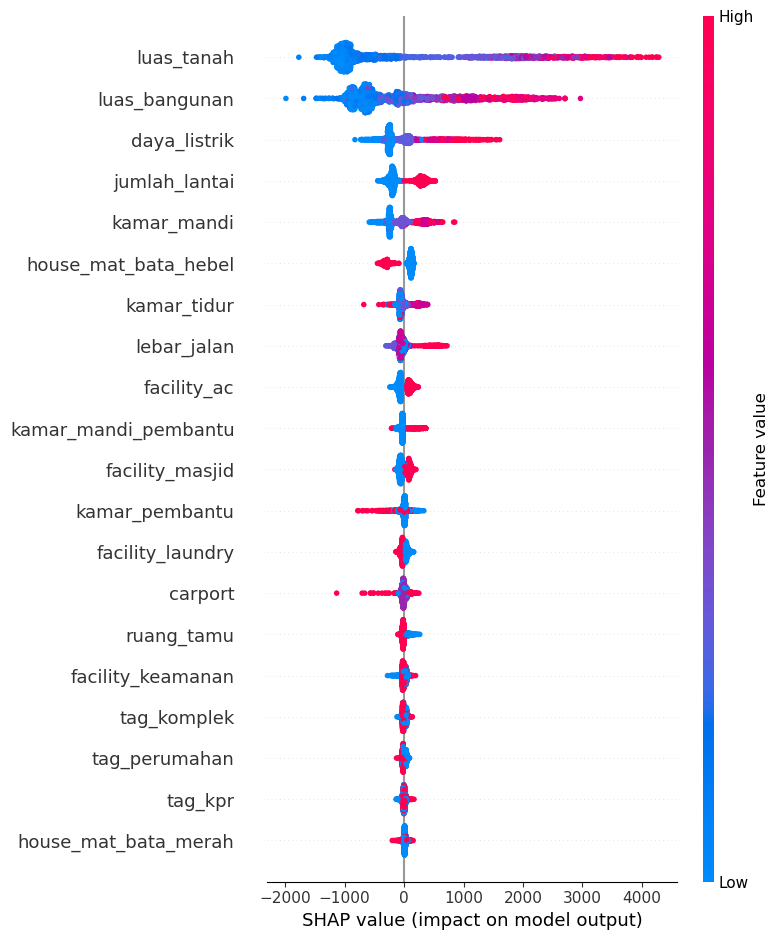

In [11]:
shap.summary_plot(shap_values, X)

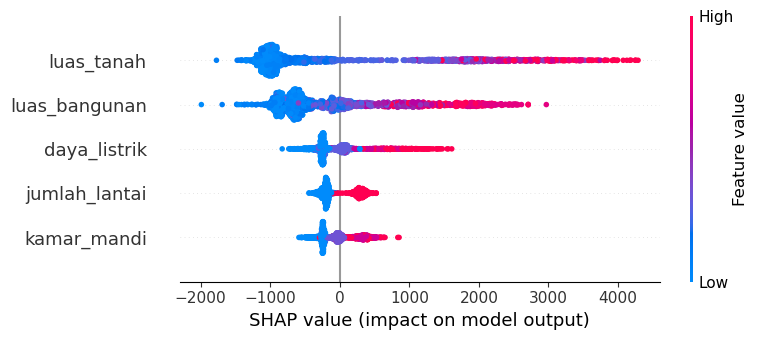

In [12]:
shap.summary_plot(shap_values, X, max_display=5)

In [14]:
clf.calc_feature_statistics(train_pool, feature="luas_tanah")

{'borders': array([  29.5,   30.5,   32.5,   35.5,   37.5,   41.5,   42.5,   44.5,
          45.5,   47.5,   49.5,   50.5,   53.5,   54.5,   55.5,   59.5,
          60.5,   61.5,   62.5,   63.5,   64.5,   65.5,   66.5,   67.5,
          68.5,   69.5,   70.5,   71.5,   72.5,   73.5,   74.5,   75.5,
          76.5,   77.5,   78.5,   79.5,   80.5,   81.5,   82.5,   83.5,
          84.5,   85.5,   86.5,   87.5,   88.5,   89.5,   90.5,   91.5,
          92.5,   93.5,   95.5,   96.5,   97.5,   98.5,   99.5,  101.5,
         102.5,  103.5,  104.5,  105.5,  106.5,  107.5,  108.5,  109.5,
         111.5,  112.5,  113.5,  114.5,  116.5,  117.5,  118.5,  119.5,
         120.5,  121.5,  122.5,  123.5,  124.5,  125.5,  126.5,  127.5,
         128.5,  129.5,  130.5,  132.5,  133.5,  134.5,  135.5,  136.5,
         139.5,  140.5,  141.5,  142.5,  143.5,  144.5,  146.5,  147.5,
         148.5,  149.5,  150.5,  151.5,  152.5,  153.5,  154.5,  155.5,
         156.5,  157.5,  159.5,  160.5,  161.5,  162.

## SHAP explainer

In [15]:
explainer = shap.Explainer(clf)

In [16]:
shap_values_exp = explainer(X)

In [17]:
shap_values_exp[0]

.values =
array([3285.00658998, 1523.86205142,  312.43295214,  360.66141307,
       -248.73872779,  146.37131442,  790.91916283,  309.64292098,
        -64.30528712,   76.55233288,   13.25059229,   57.90843413,
        -62.68221295,   88.47960585,   10.78411152,  -18.93265577,
        -94.56860092, -155.37934828,   81.57245928,   12.32459703,
         83.21853357,  -51.44792818,   29.87943796])

.base_values =
1504.5713101709412

.data =
array([3.27e+02, 4.05e+02, 4.00e+00, 3.00e+00, 1.00e+00, 1.00e+00,
       3.50e+03, 2.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00])

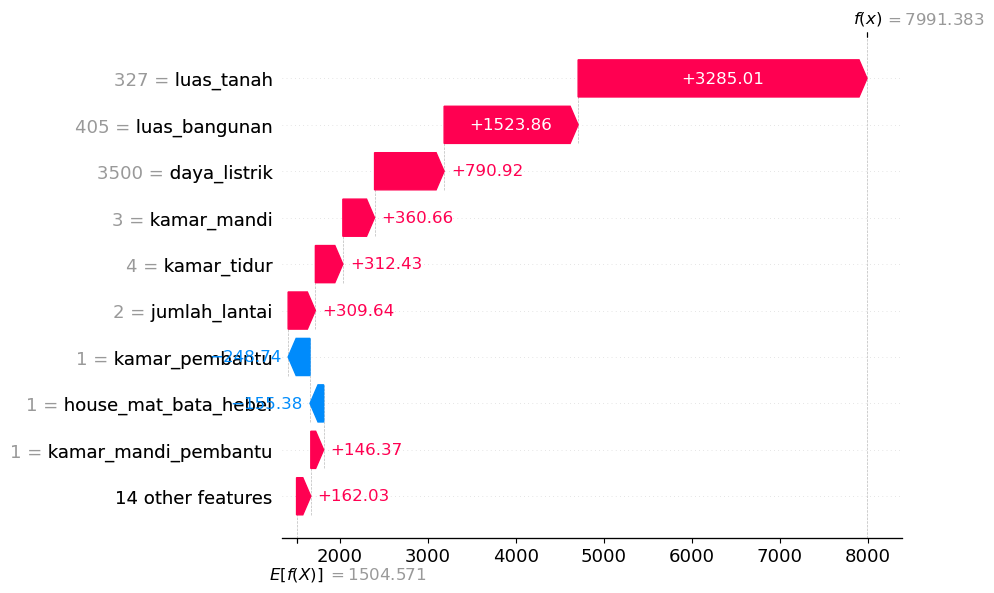

In [18]:
shap.plots.waterfall(shap_values_exp[0])

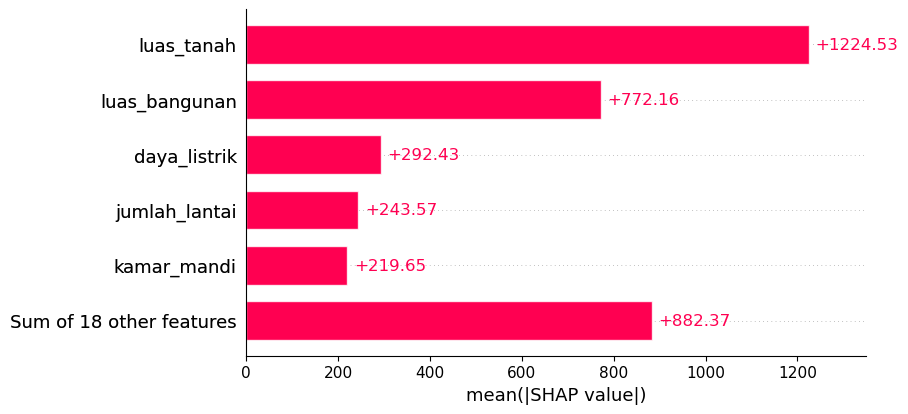

In [24]:
shap.plots.bar(shap_values_exp, max_display=6)

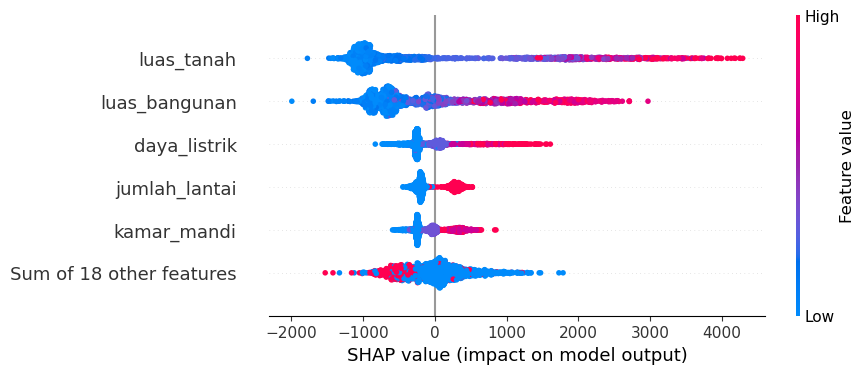

In [23]:
shap.plots.beeswarm(shap_values_exp, max_display=6)

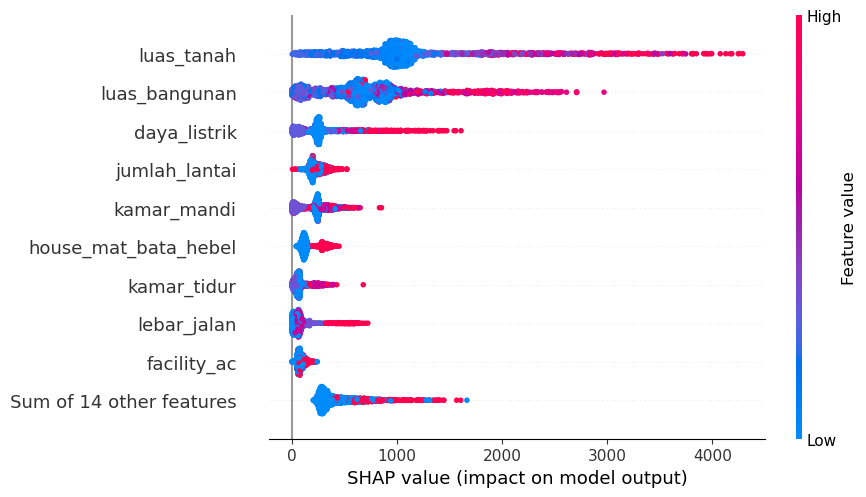

In [21]:
shap.plots.beeswarm(shap_values_exp.abs)